# Descriptive Statistics and Tests
In upcoming sections we'll talk about different forecasting models like ARMA, ARIMA, Seasonal ARIMA and others. Each model addresses a different type of time series. For this reason, in order to select an appropriate model we need to know something about the data.

In this section we'll learn how to determine if a time series is <em>stationary</em>, if it's <em>independent</em>, and if two series demonstrate <em>correlation</em> and/or <em>causality</em>

<div class="alert alert-info"><h3>Related Functions:</h3>
<tt><strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.ccovf.html'>stattools.ccovf</a></strong><font color=black>(x, y[, unbiased, demean])</font>&nbsp;&nbsp;crosscovariance for 1D<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.ccf.html'>stattools.ccf</a></strong><font color=black>(x, y[, unbiased])</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;cross-correlation function for 1d<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.periodogram.html'>stattools.periodogram</a></strong><font color=black>(X)</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Returns the periodogram for the natural frequency of X<br>
    
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html'>stattools.adfuller</a></strong><font color=black>(x[, maxlag, regression, …])</font>&nbsp;&nbsp;Augmented Dickey-Fuller unit root test<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.kpss.html'>stattools.kpss</a></strong><font color=black>(x[, regression, lags, store])</font>&nbsp;&nbsp;&nbsp;&nbsp;Kwiatkowski-Phillips-Schmidt-Shin test for stationarity.<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.coint.html'>stattools.coint</a></strong><font color=black>(y0, y1[, trend, method, …])</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Test for no-cointegration of a univariate equation<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.bds.html'>stattools.bds</a></strong><font color=black>(x[, max_dim, epsilon, distance])</font>&nbsp;&nbsp;Calculate the BDS test statistic for independence of a time series<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.q_stat.html'>stattools.q_stat</a></strong><font color=black>(x, nobs[, type])</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Returns Ljung-Box Q Statistic<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.grangercausalitytests.html'>stattools.grangercausalitytests</a></strong><font color=black>(x, maxlag[, …])</font>&nbsp;Four tests for granger non-causality of 2 timeseries<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.levinson_durbin.html'>stattools.levinson_durbin</a></strong><font color=black>(s[, nlags, isacov])</font>&nbsp;&nbsp;&nbsp;Levinson-Durbin recursion for autoregressive processes<br>

<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tools.eval_measures.mse.html'>stattools.eval_measures.mse</a></strong><font color=black>(x1, x2, axis=0)</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;mean squared error<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tools.eval_measures.rmse.html'>stattools.eval_measures.rmse</a></strong><font color=black>(x1, x2, axis=0)</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;root mean squared error<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tools.eval_measures.meanabs.html'>stattools.eval_measures.meanabs</a></strong><font color=black>(x1, x2, axis=0)</font>&nbsp;&nbsp;mean absolute error<br>
</tt>

<h3>For Further Reading:</h3>
<strong>
<a href='https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test'>Wikipedia:</a></strong>&nbsp;&nbsp;<font color=black>Augmented Dickey–Fuller test</font><br>
<strong>
<a href='https://en.wikipedia.org/wiki/KPSS_test'>Wikipedia:</a></strong>&nbsp;&nbsp;<font color=black>Kwiatkowski-Phillips-Schmidt-Shin test</font><br>
<strong>
<a href='https://en.wikipedia.org/wiki/Granger_causality'>Wikipedia:</a></strong>&nbsp;&nbsp;<font color=black>Granger causality test</font><br>
<strong>
<a href='https://otexts.com/fpp2/accuracy.html'>Forecasting: Principles and Practice:</a></strong>&nbsp;&nbsp;<font color=black>Evaluating forecast accuracy</font>

</div>



## Perform standard imports and load datasets

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Ignore harmless warning
import warnings
warnings.filterwarnings("ignore")

# Load a Seasonal Dataset
df_s= pd.read_csv('airline_passengers.csv',index_col='Month',parse_dates=True)
df_s.index.freq='MS'

# Load a Non-Seasonal Dataset
df_ns= pd.read_csv('DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df_ns.index.freq='D'

from statsmodels.tsa.stattools import ccovf,ccf,periodogram

# importing Augmented Dickey-Fuller Test (adfuller)
from statsmodels.tsa.stattools import adfuller,kpss,coint,bds,q_stat,grangercausalitytests,levinson_durbin


from statsmodels.tools.eval_measures import mse, rmse, meanabs

# Alternative:
# from sklearn.metrics import mean_squared_error

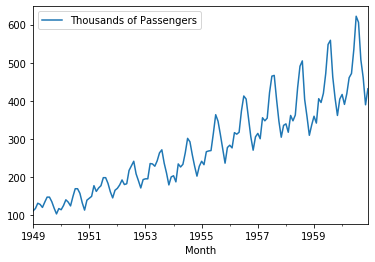

In [4]:
df_s.plot() # there is seasonality to it

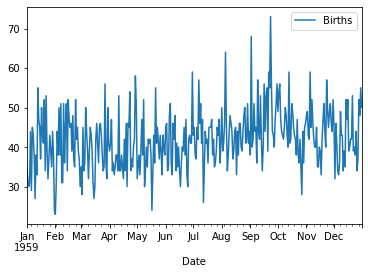

In [5]:
df_ns.plot() # there is no seasonality to it

# Tests for Stationarity
A time series is <em>stationary</em> if the mean and variance are fixed between any two equidistant points. That is, no matter where you take your observations, the results should be the same. A times series that shows seasonality is <em>not</em> stationary.

A test for stationarity usually involves a <a href='https://en.wikipedia.org/wiki/Unit_root_test'>unit root</a> hypothesis test, where the null hypothesis $H_0$ is that the series is <em>nonstationary</em>, and contains a unit root. The alternate hypothesis $H_1$ supports stationarity. The <a href='https://en.wikipedia.org/wiki/Augmented_Dickey-Fuller_test'>augmented Dickey-Fuller</a> and <a href='https://en.wikipedia.org/wiki/KPSS_test'>Kwiatkowski-Phillips-Schmidt-Shin</a> tests are stationarity tests. 

## Augmented Dickey-Fuller Test
To determine whether a series is stationary we can use the <a href='https://en.wikipedia.org/wiki/Augmented_Dickey-Fuller_test'>augmented Dickey-Fuller Test</a>. In this test the null hypothesis states that $\phi = 1$ (this is also called a unit test). The test returns several statistics we'll see in a moment. Our focus is on the p-value. A small p-value ($p<0.05$) indicates strong evidence against the null hypothesis.

To demonstrate, we'll use a dataset we know is <em>not</em> stationary, the airline_passenger dataset. First, let's plot the data along with a 12-month rolling mean and standard deviation:

In [ ]:
# importing Augmented Dickey-Fuller Test (adfuller)
#from statsmodels.tsa.stattools import adfuller,kpss,coint,bds,q_stat,grangercausalitytests,levinson_durbin


In [7]:
adfuller(df_s['Thousands of Passengers'])

(0.8153688792060569,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

In [9]:
help(adfuller)

Help on function adfuller in module statsmodels.tsa.stattools:

adfuller(x, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)
    Augmented Dickey-Fuller unit root test.
    
    The Augmented Dickey-Fuller test can be used to test for a unit root in a
    univariate process in the presence of serial correlation.
    
    Parameters
    ----------
    x : array_like, 1d
        The data series to test.
    maxlag : int
        Maximum lag which is included in test, default 12*(nobs/100)^{1/4}.
    regression : {'c','ct','ctt','nc'}
        Constant and trend order to include in regression.
    
        * 'c' : constant only (default).
        * 'ct' : constant and trend.
        * 'ctt' : constant, and linear and quadratic trend.
        * 'nc' : no constant, no trend.
    
    autolag : {'AIC', 'BIC', 't-stat', None}
        Method to use when automatically determining the lag.
    
        * if None, then maxlag lags are used.
        * if 'AIC' (default) or 

In [12]:
df_test= adfuller(df_s['Thousands of Passengers'])
df_out= pd.Series(df_test[0:4],index=['ADF test statistic','p-value','# lags used','# observations'])

In [15]:
for key,val in df_test[4].items():
    df_out[f'critical value ({key})'] = val

In [16]:
df_out

ADF test statistic        0.815369
p-value                   0.991880
# lags used              13.000000
# observations          130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770
dtype: float64

# Function for running the Augmented Dickey-Fuller Test
Since we'll use it frequently in the upcoming forecasts, let's define a function we can copy into future notebooks for running the augmented Dickey-Fuller test. Remember that we'll still have to import <tt>adfuller</tt> at the top of our notebook.


In [17]:
from statsmodels.tsa.stattools import adfuller # importing the test

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [18]:
adf_test(df_s,'Thousands of Passengers')

Augmented Dickey-Fuller Test: Thousands of Passengers
ADF test statistic        0.815369
p-value                   0.991880
# lags used              13.000000
# observations          130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


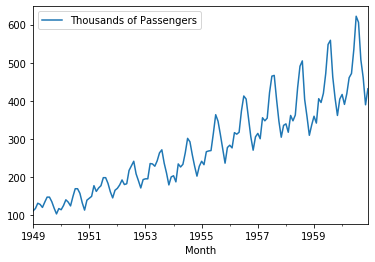

In [20]:
# there is seasonality & it is NON STATIONARY as stated in above function
df_s.plot() 

## Working on the STATIONARY DATASET

In [21]:
df_ns.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [23]:
adfuller(df_ns['Births'])

(-4.808291253559763,
 5.243412990149865e-05,
 6,
 358,
 {'1%': -3.448748905151901,
  '5%': -2.8696473721448728,
  '10%': -2.5710891239349585},
 2343.8290926464197)

In [24]:
df2_test= adfuller(df_ns['Births'])
df2_out= pd.Series(df_test[0:4],index=['ADF test statistic','p-value','# lags used','# observations'])

In [25]:
for key,val in df_test[4].items():
    df2_out[f'critical value ({key})'] = val

In [26]:
df2_out

ADF test statistic        0.815369
p-value                   0.991880
# lags used              13.000000
# observations          130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770
dtype: float64

# Function for running the Augmented Dickey-Fuller Test
Since we'll use it frequently in the upcoming forecasts, let's define a function we can copy into future notebooks for running the augmented Dickey-Fuller test. Remember that we'll still have to import <tt>adfuller</tt> at the top of our notebook.


In [27]:
from statsmodels.tsa.stattools import adfuller # importing the test

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [28]:
adf_test(df_ns,'Births')

Augmented Dickey-Fuller Test: Births
ADF test statistic       -4.808291
p-value                   0.000052
# lags used               6.000000
# observations          358.000000
critical value (1%)      -3.448749
critical value (5%)      -2.869647
critical value (10%)     -2.571089
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


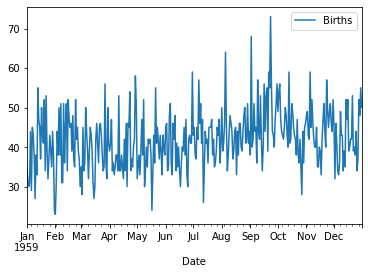

In [29]:
# there is no seasonality & data is STATIONARY as stated in above function
df_ns.plot() 

# Granger Causality Tests
The <a href='https://en.wikipedia.org/wiki/Granger_causality'>Granger causality test</a> is a a hypothesis test to determine if one time series is useful in forecasting another. While it is fairly easy to measure correlations between series - when one goes up the other goes up, and vice versa - it's another thing to observe changes in one series correlated to changes in another after a consistent amount of time. This <em>may</em> indicate the presence of causality, that changes in the first series influenced the behavior of the second. However, it may also be that both series are affected by some third factor, just at different rates. Still, it can be useful if changes in one series can predict upcoming changes in another, whether there is causality or not. In this case we say that one series "Granger-causes" another.

In the case of two series, $y$ and $x$, the null hypothesis is that lagged values of $x$ do <em>not</em> explain variations in $y$.<br>
In other words, it assumes that $x_t$ doesn’t Granger-cause $y_t$.

The stattools <tt><strong>grangercausalitytests</strong></tt> function offers four tests for granger non-causality of 2 timeseries

For this example we'll use the samples.csv file, where columns 'a' and 'd' are stationary datasets.

In [31]:
df3 = pd.read_csv('samples.csv',index_col=0,parse_dates=True)
df3.index.freq= 'MS'

In [32]:
df3

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62
...,...,...,...,...
1959-08-01,49,73,9338,58
1959-09-01,41,77,9502,38
1959-10-01,64,70,9667,42
1959-11-01,37,87,9833,62


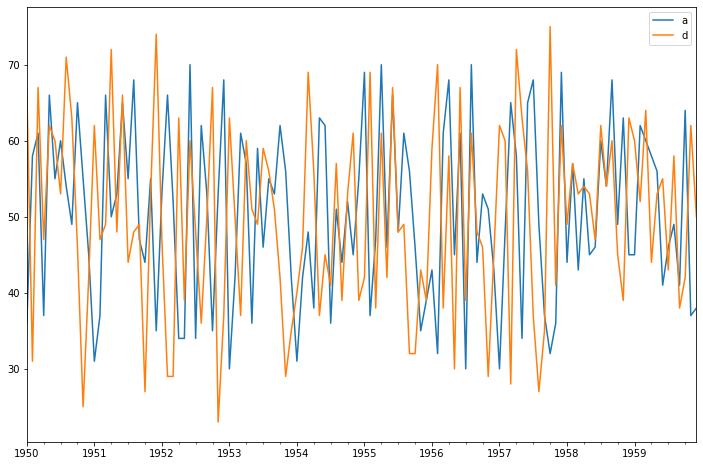

In [34]:
df3[['a','d']].plot(figsize=(12,8))

It's hard to tell from this overlay but <tt>df['d']</tt> almost perfectly predicts the behavior of <tt>df['a']</tt>.<br>
To see this more clearly (spoiler alert!), we will shift <tt>df['d']</tt> two periods forward.

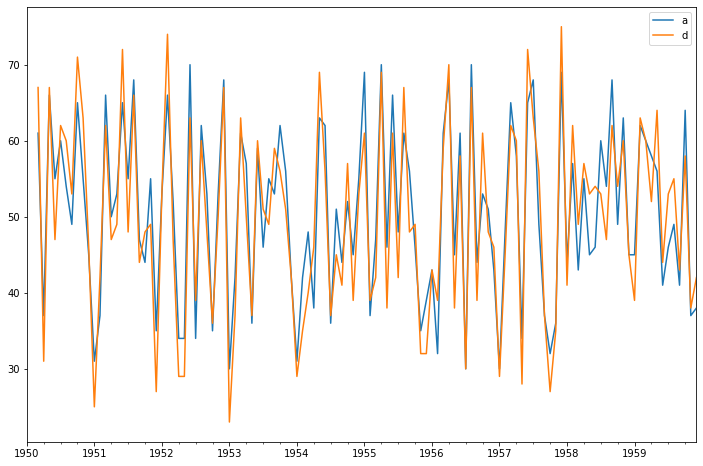

In [38]:
# there is a relation between a and d column
# two days after there is some change in d a is relecting that.
# Col d has CAUSALITY on col a
df3['a'].iloc[2:].plot(figsize=(12,8),legend=True)
df3['d'].shift(2).plot(legend=True)

### Run the test
The function takes in a 2D array [y,x] and a maximum number of lags to test on x. Here our y is column 'a' and x is column 'd'. We'll set maxlags to 3.

In [41]:
from statsmodels.tsa.stattools import grangercausalitytests

In [42]:
grangercausalitytests(df3[['a','d']],maxlag=3);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.7492  , p=0.1860  , df=1
likelihood ratio test: chi2=1.7365  , p=0.1876  , df=1
parameter F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=597.3806, p=0.0000  , df=2
likelihood ratio test: chi2=212.6514, p=0.0000  , df=2
parameter F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=602.2669, p=0.0000  , df=3
likelihood ratio test: chi2=212.4789, p=0.0000  , df=3
parameter F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3


Essentially we're looking for extremely low p-values, which we see at lag 2.<br>
By comparison, let's compare two datasets that are not at all similar, 'b' and 'd'.

In [43]:
# Add a semicolon at the end to avoid duplicate output
grangercausalitytests(df3[['b','d']],maxlag=3);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.5619  , p=0.2114  , df=1
likelihood ratio test: chi2=1.5517  , p=0.2129  , df=1
parameter F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=0.9086  , p=0.6349  , df=2
likelihood ratio test: chi2=0.9051  , p=0.6360  , df=2
parameter F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=1.7018  , p=0.6365  , df=3
likelihood ratio test: chi2=1.6895  , p=0.6393  , df=3
parameter F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3
